In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/ALANKRIT MISHRA/Downloads/archive/spam.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [9]:
import chardet
file='C:/Users/ALANKRIT MISHRA/Downloads/archive/spam.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [10]:
df=pd.read_csv(file,encoding='Windows-1252')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.head

<bound method NDFrame.head of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2224,ham,"I prefer my free days... Tues, wed, fri oso ca..."
4021,ham,U gd lor go shopping i got stuff to do. U wan ...
4984,ham,Dont let studying stress you out. L8r.
4463,ham,Ranjith cal drpd Deeraj and deepak 5min hold
4122,ham,"Cool, want me to go to kappa or should I meet ..."


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
df['target']=encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
df.duplicated().sum()

403

In [22]:
df=df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

In [25]:
#2 exploratory data analysis

In [26]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

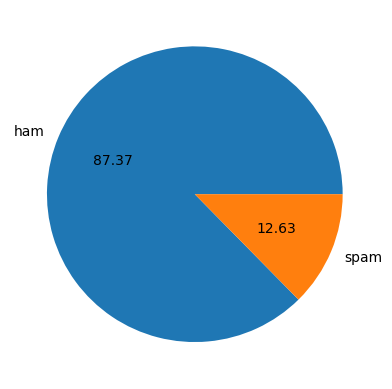

In [27]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
#data imbalance

In [29]:
import nltk# natural language tool kit
!pip install nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ALANKRIT
[nltk_data]     MISHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df['charac']=df['text'].apply(len) #tells about the numbers of characters used

C:\Users\ALANKRIT MISHRA\AppData\Local\Temp\ipykernel_13052\2918509465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charac']=df['text'].apply(len) #tells about the numbers of characters used


In [32]:
df.head()

,target,text,charac
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
#number of words
df['words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #used to break each message on word by word in list basis

C:\Users\ALANKRIT MISHRA\AppData\Local\Temp\ipykernel_13052\3266146303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #used to break each message on word by word in list basis


In [34]:
df.head()

,target,text,charac,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
df['sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #used to break each meassage on the basis of sentences
df.head()

C:\Users\ALANKRIT MISHRA\AppData\Local\Temp\ipykernel_13052\3842292058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #used to break each meassage on the basis of sentences


,target,text,charac,words,sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['charac','words','sen']].describe()

,charac,words,sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
df[df['target']==0][['charac','words','sen']].describe()#ham

,charac,words,sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
df[df['target']==1][['charac','words','sen']].describe()#spam

,charac,words,sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [39]:
import seaborn as sns

<AxesSubplot:xlabel='charac', ylabel='Count'>

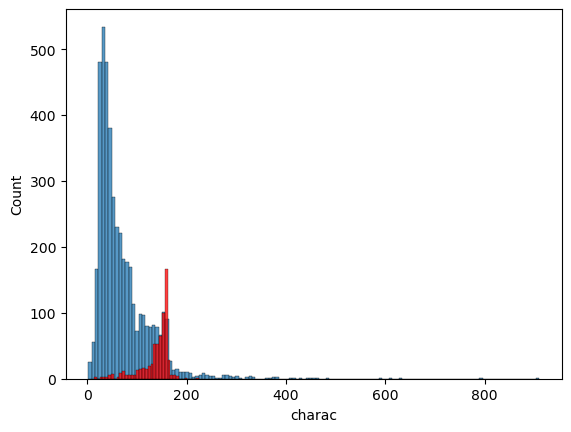

In [40]:
sns.histplot(df[df['target']==0]['charac'])
sns.histplot(df[df['target']==1]['charac'],color='red')

<AxesSubplot:xlabel='words', ylabel='Count'>

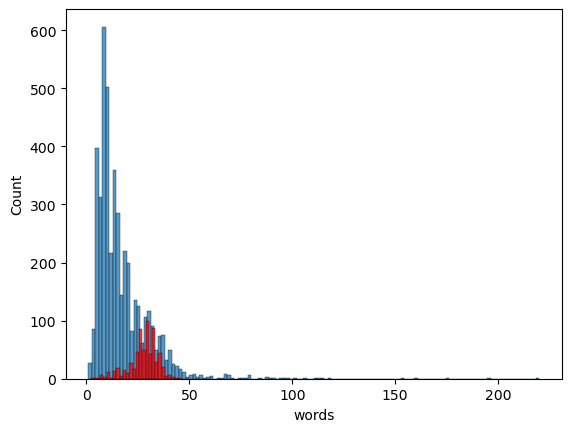

In [41]:
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red')

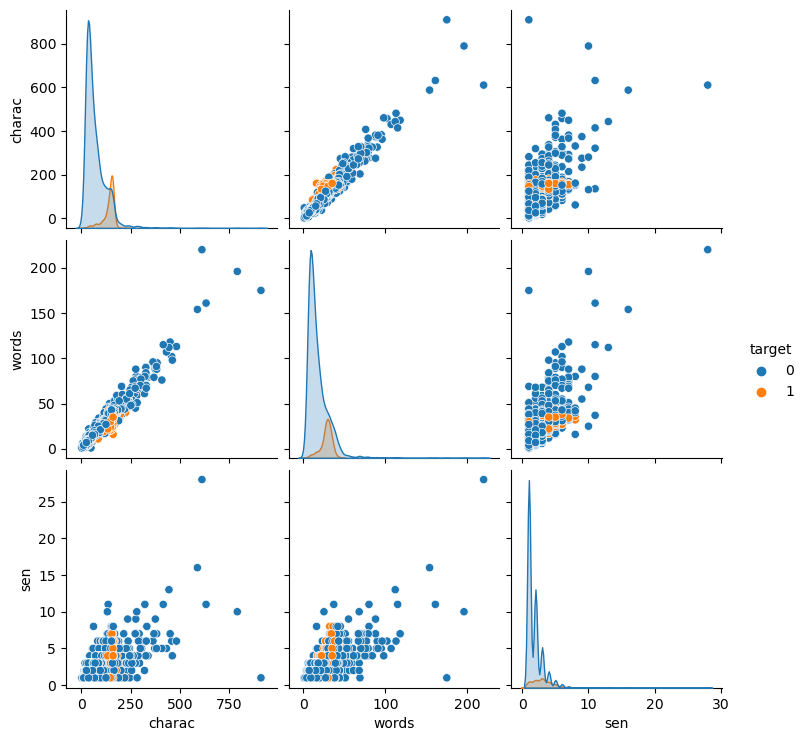

In [42]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

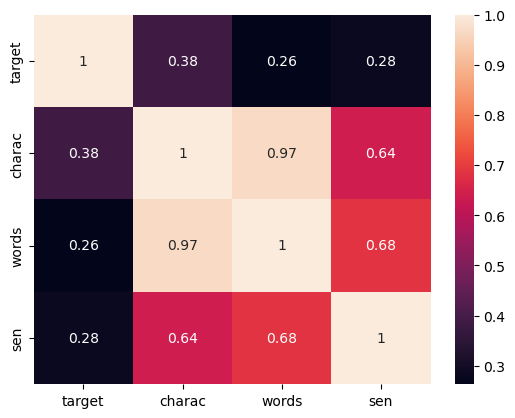

In [43]:
sns.heatmap(df.corr(),annot=True)

data preprocessing

In [44]:
from nltk.corpus import stopwords

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [47]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [48]:
transform_text('I loved the utube lecture. How about you')


'love utub lectur'

In [49]:
df['transform_text']=df['text'].apply(transform_text)

C:\Users\ALANKRIT MISHRA\AppData\Local\Temp\ipykernel_13052\2760768174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(transform_text)


In [50]:
df.head()

,target,text,charac,words,sen,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [53]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

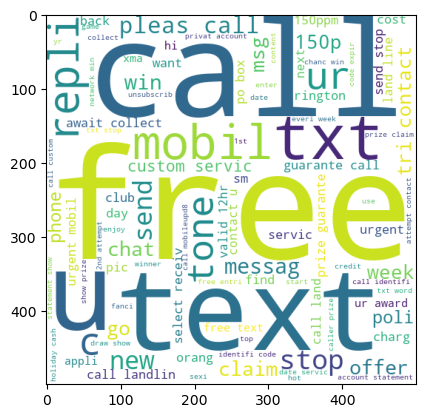

In [54]:
plt.imshow(spam_wc)

In [59]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [61]:
from collections import Counter
sns.barplot(pd.Counter(spam_corpus)

SyntaxError: unexpected EOF while parsing (2466837586.py, line 2)

In [62]:
ham_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

Model building
# bag of words

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [64]:
x=tfidf.fit_transform(df['transform_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# from sklearn.preprocessing import MinMaxScaler
# sc=MinMaxScaler()
# x=sc.fit_transform(x) not useful

In [66]:
y=df['target'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()

In [71]:
gb.fit(x_train,y_train)
y1=gb.predict(x_test)
print(accuracy_score(y_test,y1))
print(confusion_matrix(y_test,y1))
print(precision_score(y_test,y1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [72]:
mb.fit(x_train,y_train)# best
y2=mb.predict(x_test)
print(accuracy_score(y_test,y2))
print(confusion_matrix(y_test,y2))
print(precision_score(y_test,y2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
bb.fit(x_train,y_train)
y3=bb.predict(x_test)
print(accuracy_score(y_test,y3))
print(confusion_matrix(y_test,y3))
print(precision_score(y_test,y3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [74]:
# tfidf mb

In [75]:
# model improve
#1. change max_feature paramerter of tfIdf

In [76]:
import pickle
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))